<a href="https://colab.research.google.com/github/oumatonny/Hash/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the data into a Python session as a Pandas DataFrame

In [ ]:
# Importing Pandas dataframe
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### ___Dataset Description And Columns___

In [ ]:

print("""
             Dataset Columns and their Data types
             ------------------------------------
""")
# Check the data types of each column
print(df.dtypes)

print("""
               ---------------------
               Dataset Description
               ---------------------
""")
df.describe()



             Dataset Columns and their Data types
             ------------------------------------

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

               ---------------------
               Dataset Description
               ---------------------



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 2. Spliting the data 75% training and 25% testing

In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 545.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 554.1 kB/s eta 0:00:000:00:010:00:01:01


In [ ]:
# import train_test_split from sklearn, first run above cell to install sklearn if not installed
from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")


Training data shape: (298, 9)
Testing data shape: (100, 9)


## 3. Visualize necessary columns in the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric and categorical columns
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_cols = ['model year', 'origin']

print(f'Numerical Columns: {numeric_cols}')
print(f'Categorical Columns: {categorical_cols}')

Numerical Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
Categorical Columns: ['model year', 'origin']


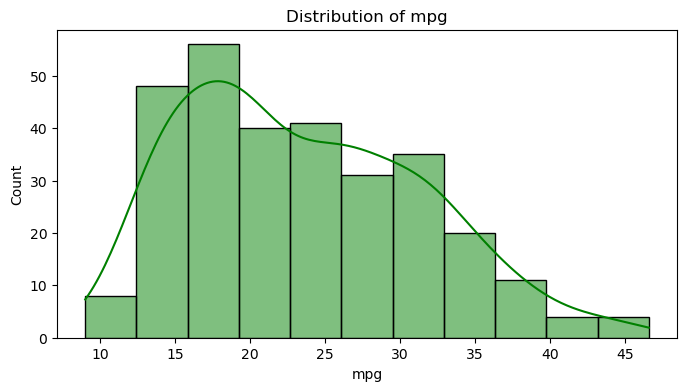

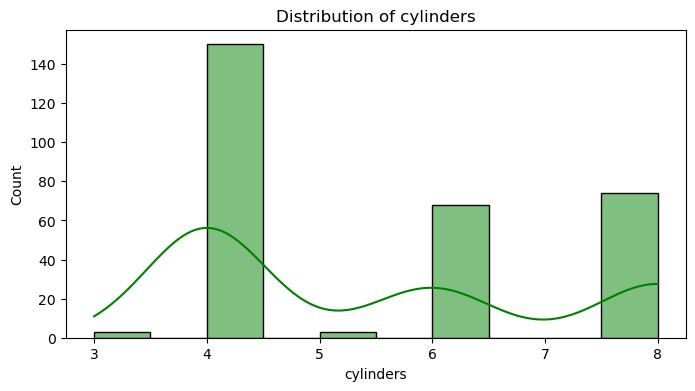

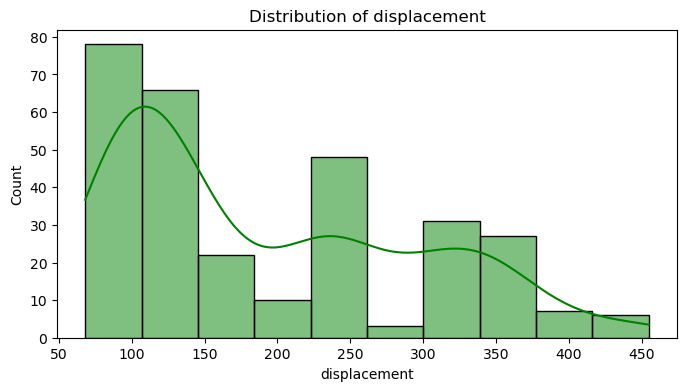

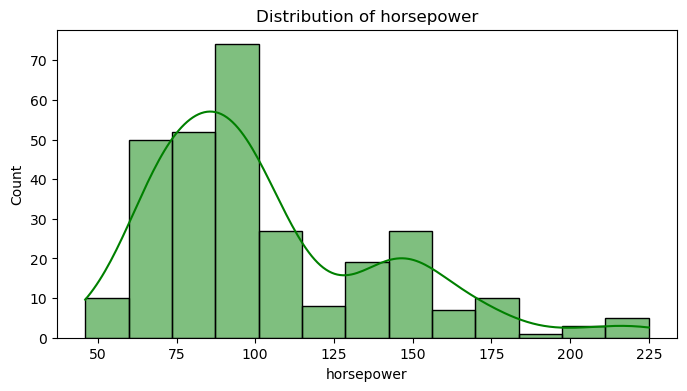

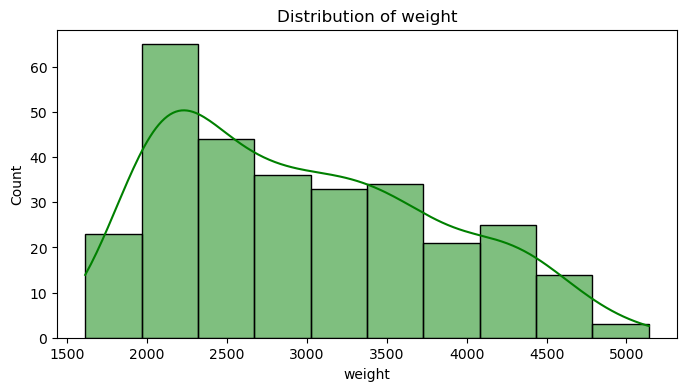

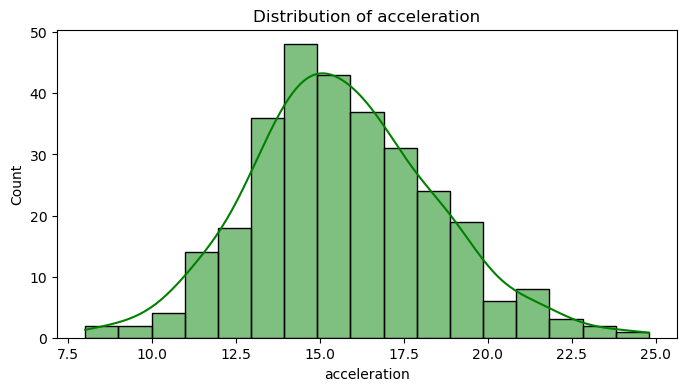

In [ ]:

# Ploting the distributions of numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
# Identify symmetric and skewed columns
symmetric_cols = []
skewed_cols = []

for col in numeric_cols:
    if abs(train_df[col].skew()) < 0.5:
        symmetric_cols.append(col)
    else:
        skewed_cols.append(col)

print(f"Symmetric columns: {symmetric_cols}")
print(f"Skewed columns: {skewed_cols}")

Symmetric columns: ['mpg', 'weight', 'acceleration']
Skewed columns: ['cylinders', 'displacement', 'horsepower']


## 4. Build a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Pipeline for symmetric numeric columns
symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for skewed numeric columns
skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('symmetric', symmetric_pipeline, symmetric_cols),
    ('skewed', skewed_pipeline, skewed_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])


## 5. Train the pipeline and transform the data

In [ ]:
# Fit the preprocessor on the training data
preprocessor.fit(train_df)

# Transform the training and testing data
train_processed = preprocessor.transform(train_df)
test_processed = preprocessor.transform(test_df)

print(f"Processed training data shape: {train_processed.shape}")
print(f"Processed testing data shape: {test_processed.shape}")

Processed training data shape: (298, 22)
Processed testing data shape: (100, 22)
